In [1]:
pip install pycountry

In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from scipy import stats
from scipy.stats import norm
import statistics
import statsmodels.api as sm
import pylab as py

import plotly.express as px

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
df = pd.read_csv("/content/Cleaned_GapMinder.csv")
df.head()

,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,oilperperson,country,countrycode
0,8740.966,0.030,0.570,26.800,75944000.000,25.600,1.935,3.654,49.624,0.000,1173.179,6.684,55.700,24.040,1.484,Afghanistan,AFG
1,1914.997,7.290,1.025,57.400,223747333.333,42.100,1.935,44.990,76.918,9.000,636.341,7.699,51.400,46.720,1.484,Albania,ALB
2,2231.993,0.690,2.307,23.500,2932108666.667,31.700,0.100,12.500,73.131,2.000,590.510,4.849,50.500,65.220,0.420,Algeria,DZA
3,20423.174,10.170,1.444,37.403,5033261621.667,47.549,1.935,81.000,69.754,3.689,1173.179,5.362,58.636,88.920,1.484,Andorra,AND
4,1381.004,5.570,1.461,23.100,248358000.000,69.400,2.000,10.000,51.093,-2.000,172.999,14.555,75.700,56.700,1.484,Angola,AGO


In [4]:
df.shape

(213, 17)

In [5]:
df = df.rename(columns = {
    "breastcancerper100th": "breastcancerate",
    "suicideper100th": "sucidierate"
})
df.head()

,incomeperperson,alcconsumption,armedforcesrate,breastcancerate,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,polityscore,relectricperperson,sucidierate,employrate,urbanrate,oilperperson,country,countrycode
0,8740.966,0.030,0.570,26.800,75944000.000,25.600,1.935,3.654,49.624,0.000,1173.179,6.684,55.700,24.040,1.484,Afghanistan,AFG
1,1914.997,7.290,1.025,57.400,223747333.333,42.100,1.935,44.990,76.918,9.000,636.341,7.699,51.400,46.720,1.484,Albania,ALB
2,2231.993,0.690,2.307,23.500,2932108666.667,31.700,0.100,12.500,73.131,2.000,590.510,4.849,50.500,65.220,0.420,Algeria,DZA
3,20423.174,10.170,1.444,37.403,5033261621.667,47.549,1.935,81.000,69.754,3.689,1173.179,5.362,58.636,88.920,1.484,Andorra,AND
4,1381.004,5.570,1.461,23.100,248358000.000,69.400,2.000,10.000,51.093,-2.000,172.999,14.555,75.700,56.700,1.484,Angola,AGO


In [6]:
df.dtypes

incomeperperson       float64
alcconsumption        float64
armedforcesrate       float64
breastcancerate       float64
co2emissions          float64
femaleemployrate      float64
hivrate               float64
internetuserate       float64
lifeexpectancy        float64
polityscore           float64
relectricperperson    float64
sucidierate           float64
employrate            float64
urbanrate             float64
oilperperson          float64
country                object
countrycode            object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   incomeperperson     213 non-null    float64
 1   alcconsumption      213 non-null    float64
 2   armedforcesrate     213 non-null    float64
 3   breastcancerate     213 non-null    float64
 4   co2emissions        213 non-null    float64
 5   femaleemployrate    213 non-null    float64
 6   hivrate             213 non-null    float64
 7   internetuserate     213 non-null    float64
 8   lifeexpectancy      213 non-null    float64
 9   polityscore         213 non-null    float64
 10  relectricperperson  213 non-null    float64
 11  sucidierate         213 non-null    float64
 12  employrate          213 non-null    float64
 13  urbanrate           213 non-null    float64
 14  oilperperson        213 non-null    float64
 15  country             213 non-null    object 
 16  countryc

In [8]:
df.describe()

,incomeperperson,alcconsumption,armedforcesrate,breastcancerate,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,polityscore,relectricperperson,sucidierate,employrate,urbanrate,oilperperson
count,213.000,213.000,213.000,213.000,213.000,213.000,213.000,213.000,213.000,213.000,213.000,213.000,213.000,213.000,213.000
mean,6610.648,6.669,1.211,36.494,1587879863.451,47.471,1.365,35.633,69.799,3.694,984.374,9.344,58.592,56.769,1.484
std,6933.041,4.526,0.751,18.275,2211029532.989,12.437,1.267,26.369,9.087,5.474,650.163,5.074,9.277,23.276,0.987
min,103.776,0.030,0.000,3.900,132000.000,20.350,0.060,0.210,49.624,-9.500,0.000,0.201,38.200,10.400,0.032
25%,952.827,3.230,0.570,23.100,37950000.000,40.300,0.200,11.500,65.493,1.000,431.625,5.633,53.500,37.340,1.484
50%,3665.348,6.689,1.212,35.000,234864666.667,47.549,1.200,35.633,72.231,3.689,1173.179,9.508,58.636,56.769,1.484
75%,8740.966,9.500,1.444,44.300,2421917666.667,53.600,1.935,51.958,76.072,8.000,1173.179,11.980,63.700,73.500,1.484
max,20423.174,18.905,2.756,76.100,5997869166.667,73.550,4.539,95.638,83.394,10.000,2285.509,21.501,79.000,100.000,12.229


## Data Visualisations

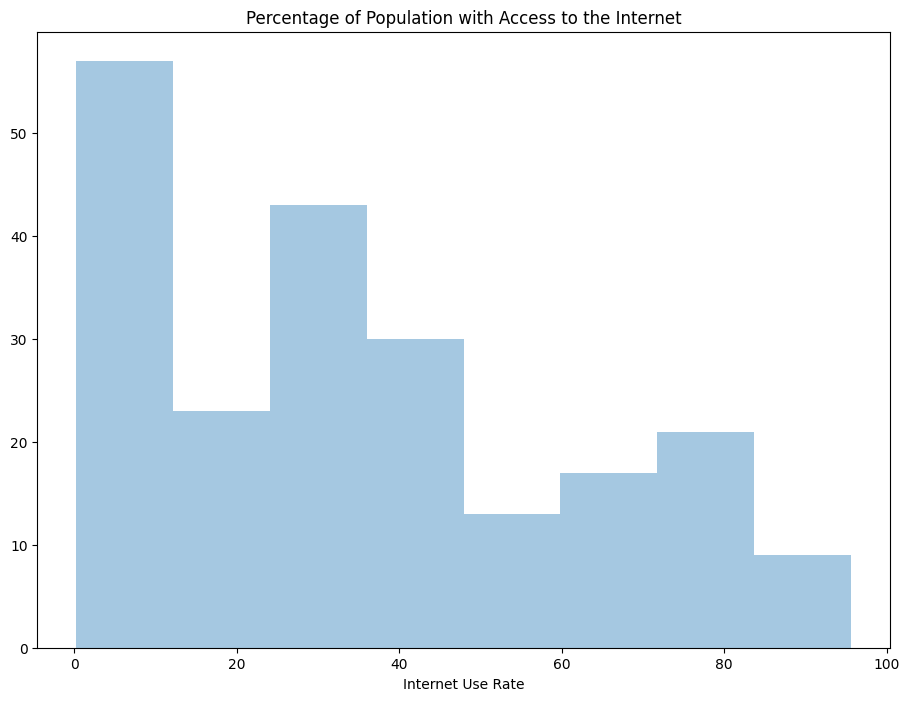

In [9]:
plt.figure(figsize = (11, 8))
sns.distplot(df["internetuserate"], kde=False);
plt.xlabel('Internet Use Rate')
plt.title('Percentage of Population with Access to the Internet')
plt.show()

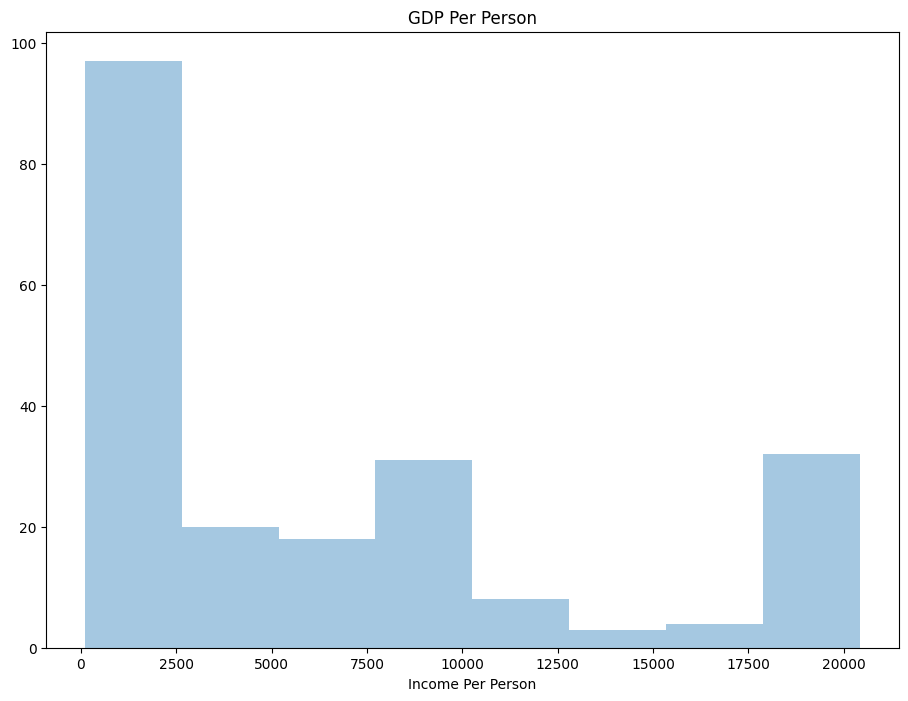

In [10]:
plt.figure(figsize = (11, 8))
sns.distplot(df["incomeperperson"], kde=False);
plt.xlabel('Income Per Person')
plt.title('GDP Per Person')
plt.show()

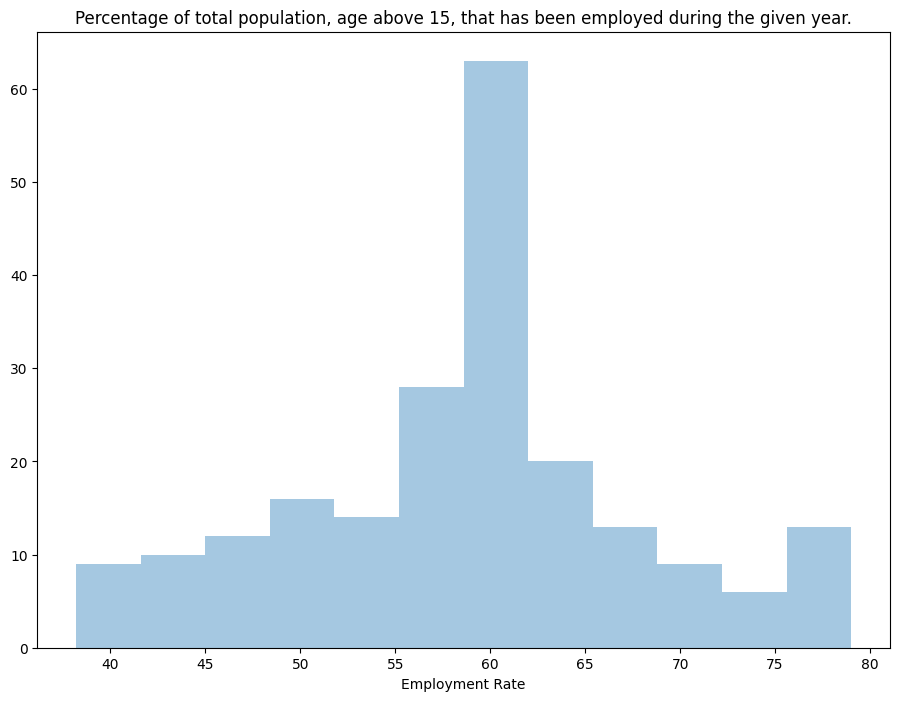

In [11]:
plt.figure(figsize = (11, 8))
sns.distplot(df["employrate"], kde=False);
plt.xlabel('Employment Rate')
plt.title('Percentage of total population, age above 15, that has been employed during the given year.')
plt.show()

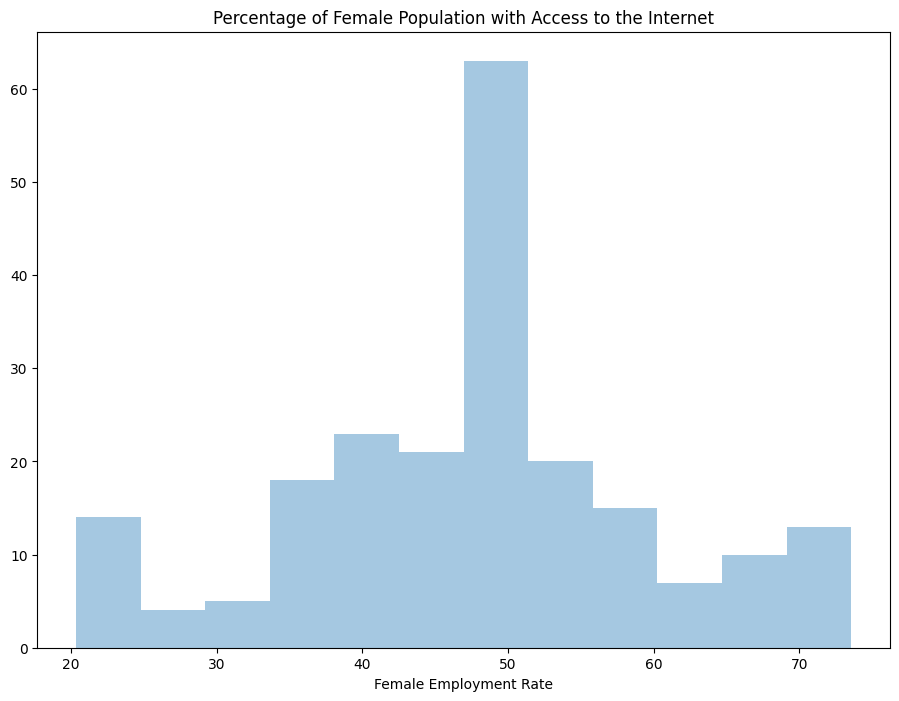

In [12]:
plt.figure(figsize = (11, 8))
sns.distplot(df["femaleemployrate"], kde=False);
plt.xlabel('Female Employment Rate')
plt.title('Percentage of Female Population with Access to the Internet')
plt.show()

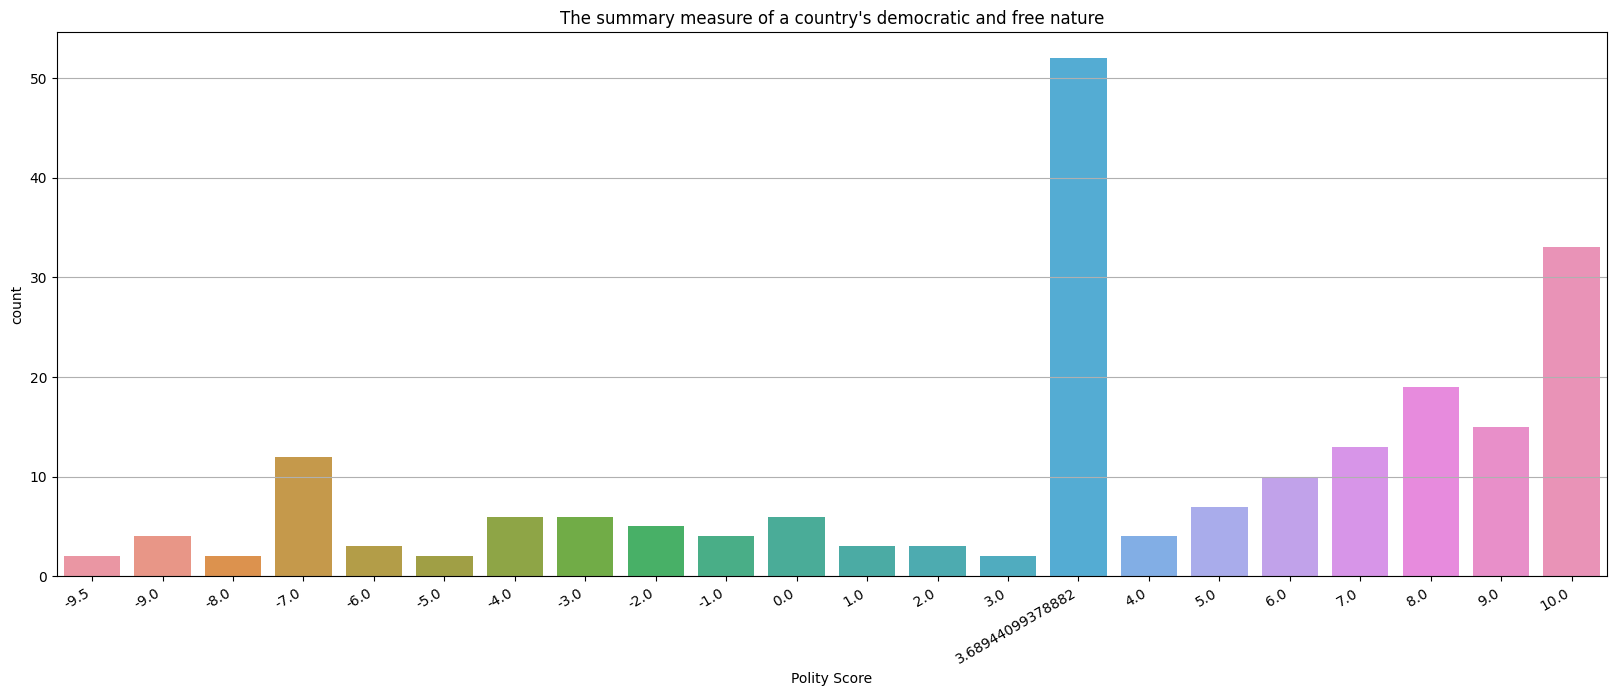

In [13]:
fig, ax = plt.subplots(1, figsize = (20, 8))
ax.grid()
fig.autofmt_xdate()
sns.countplot(x="polityscore", data=df)
plt.xlabel('Polity Score')
plt.title("The summary measure of a country's democratic and free nature")
plt.show()

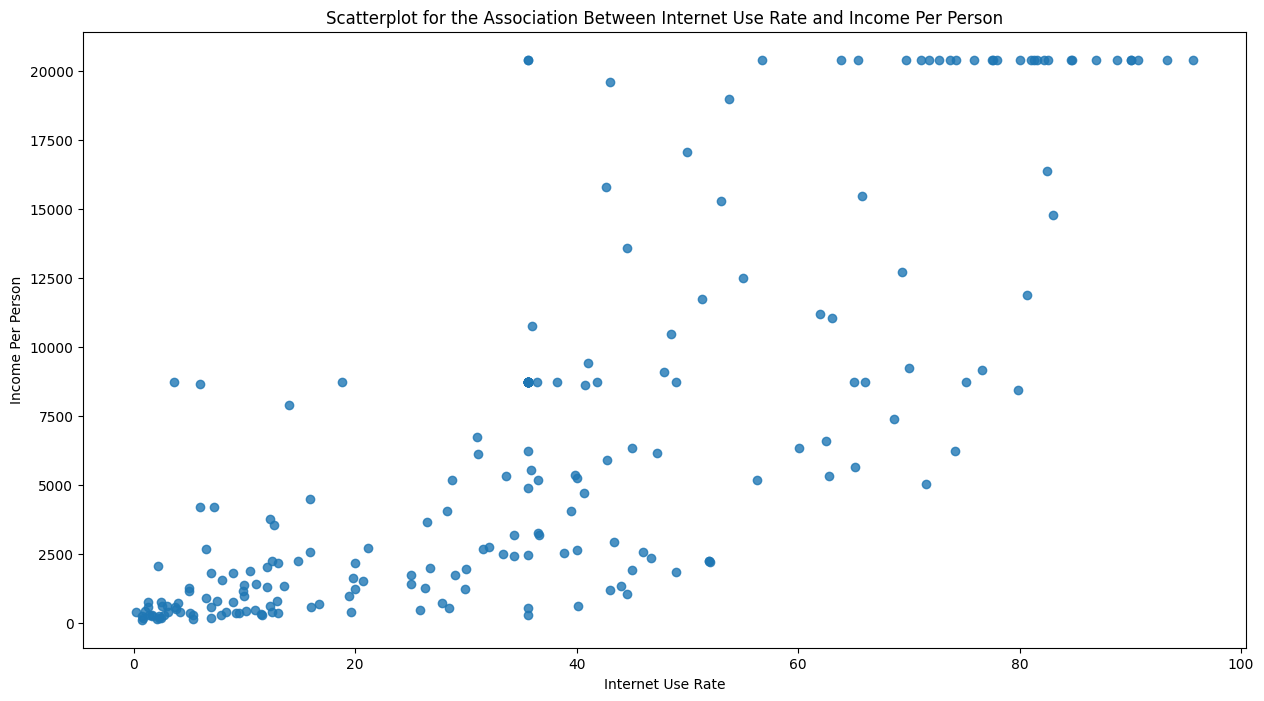

In [14]:
plt.figure(figsize = (15, 8))
scat1 = sns.regplot(x="internetuserate", y="incomeperperson", fit_reg=False, data=df)
plt.xlabel('Internet Use Rate')
plt.ylabel('Income Per Person')
plt.title('Scatterplot for the Association Between Internet Use Rate and Income Per Person')
plt.show()

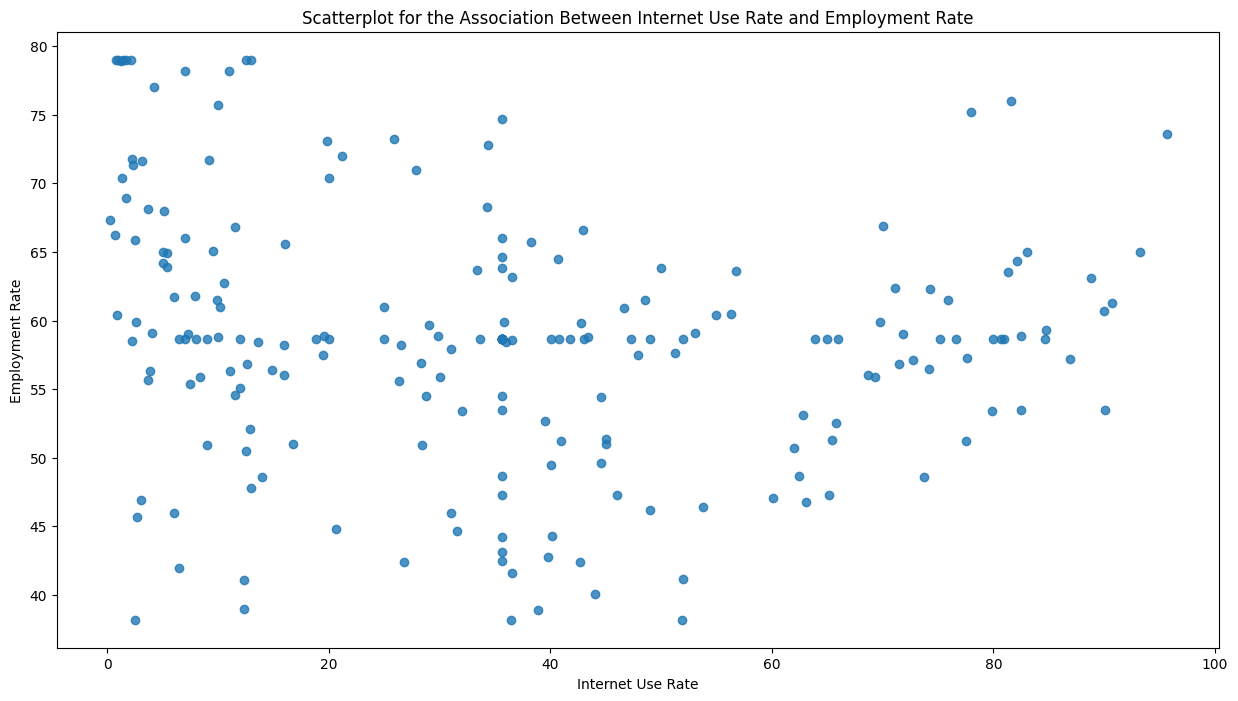

In [15]:
plt.figure(figsize = (15, 8))
scat2 = sns.regplot(x="internetuserate", y="employrate", fit_reg=False, data=df)
plt.xlabel('Internet Use Rate')
plt.ylabel('Employment Rate')
plt.title('Scatterplot for the Association Between Internet Use Rate and Employment Rate')
plt.show()

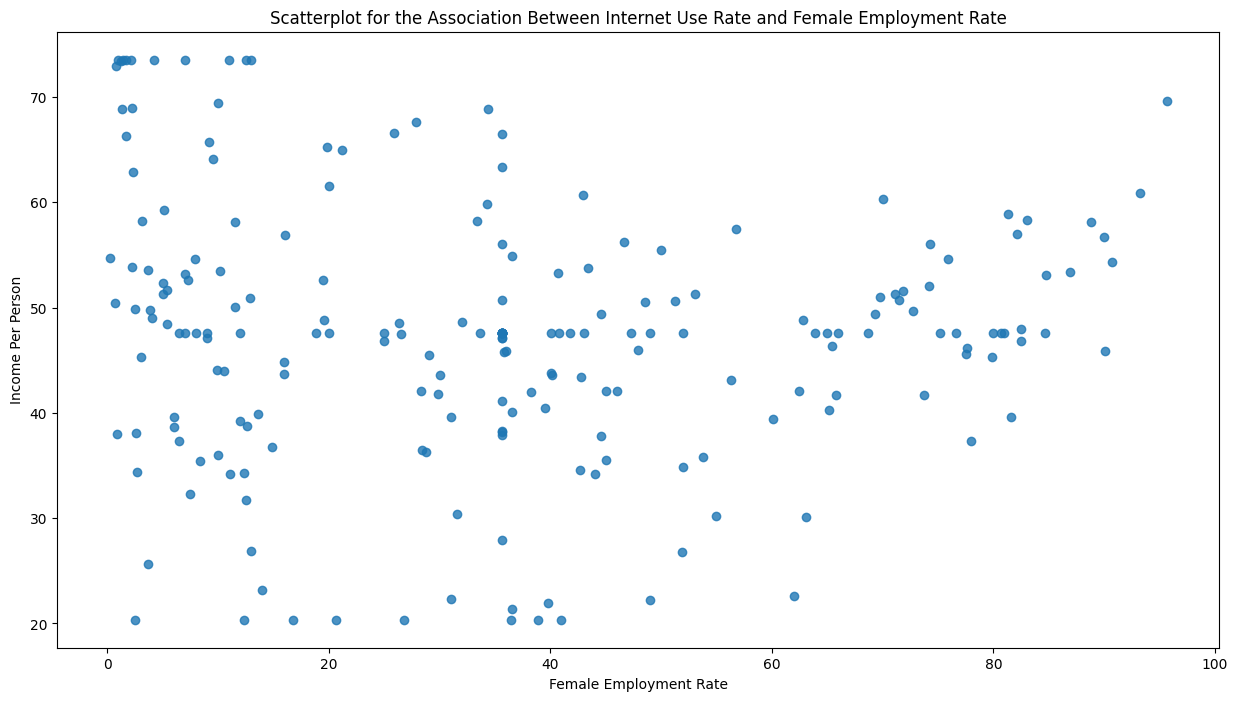

In [16]:
plt.figure(figsize = (15, 8))
scat3 = sns.regplot(x="internetuserate", y="femaleemployrate", fit_reg=False, data=df)
plt.xlabel('Female Employment Rate')
plt.ylabel('Income Per Person')
plt.title('Scatterplot for the Association Between Internet Use Rate and Female Employment Rate')
plt.show()

## Bivariate Distribution

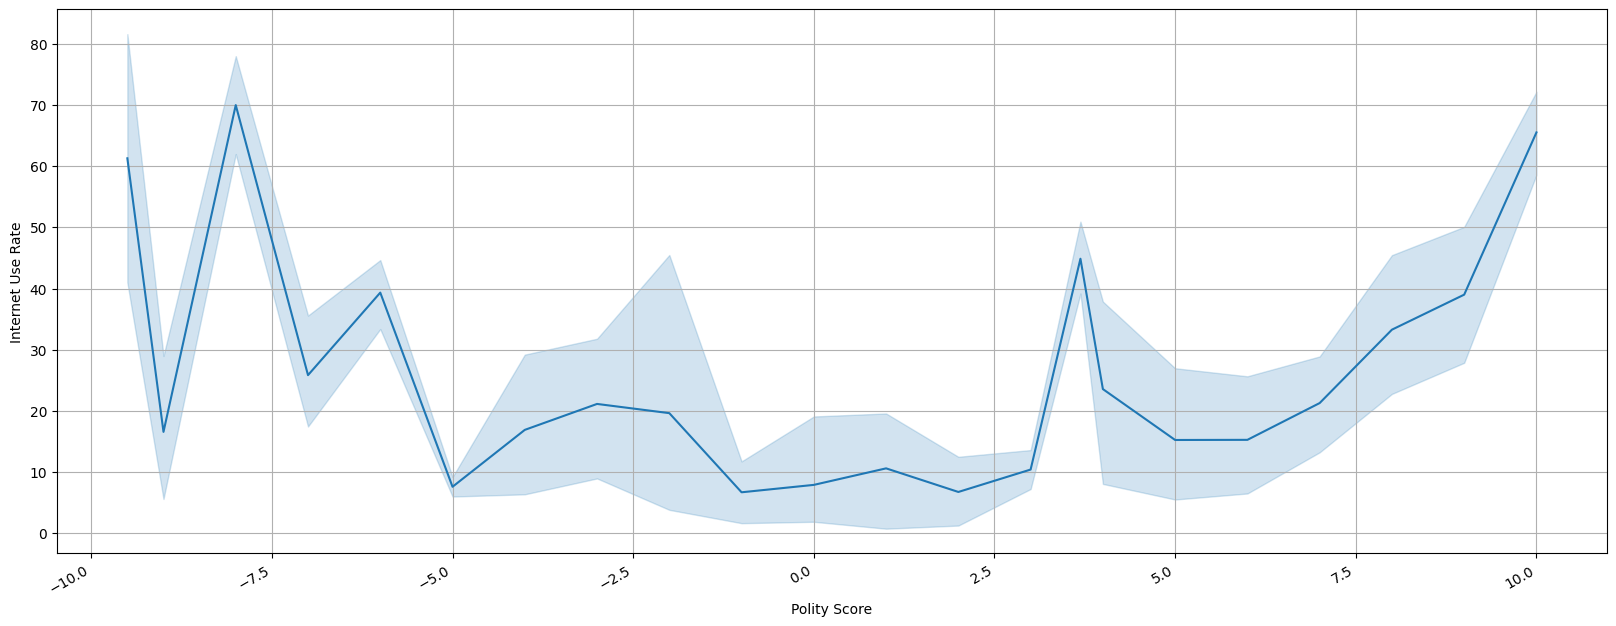

In [17]:
fig, ax = plt.subplots(1, figsize = (20, 8))
ax.grid()
fig.autofmt_xdate()
sns.lineplot(x="polityscore", y="internetuserate", data=df)
plt.xlabel('Polity Score')
plt.ylabel('Internet Use Rate')
plt.show()

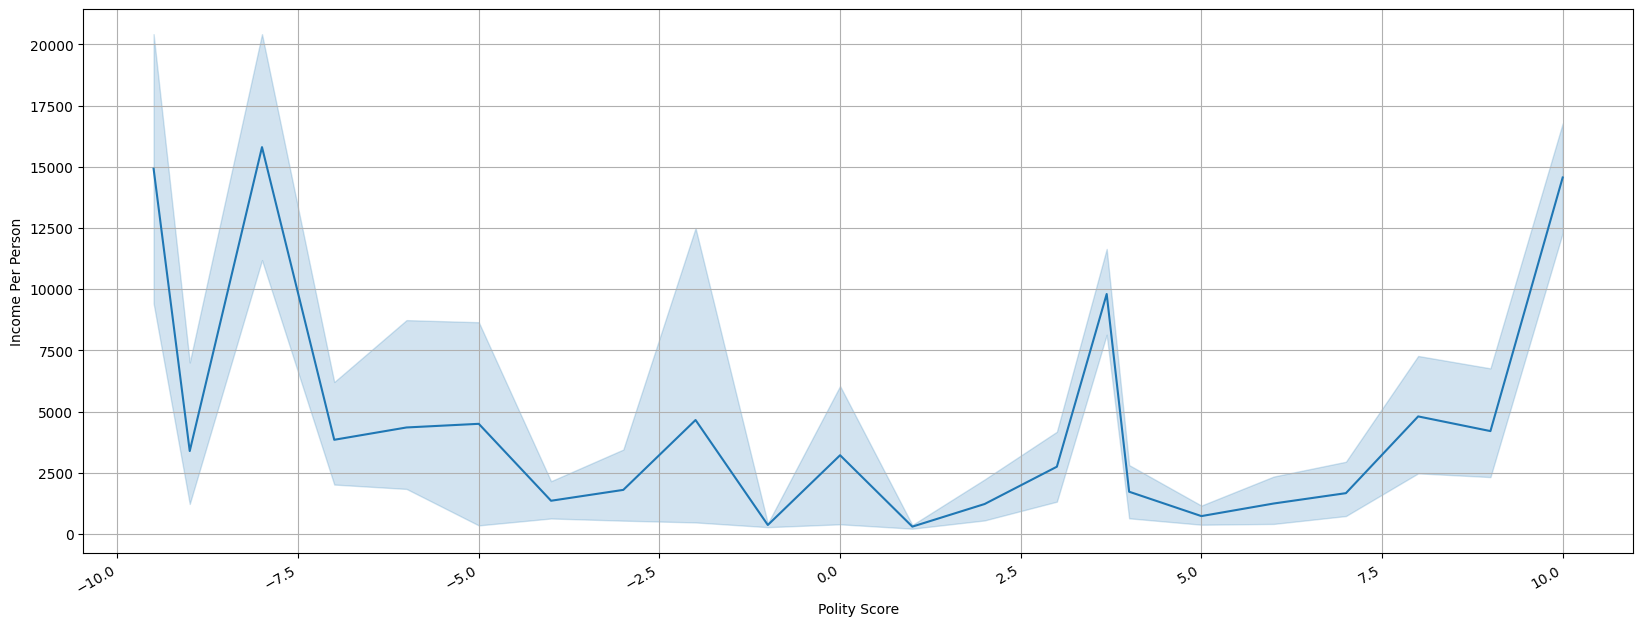

In [18]:
fig, ax = plt.subplots(1, figsize = (20, 8))
ax.grid()
fig.autofmt_xdate()
sns.lineplot(x="polityscore", y="incomeperperson", data=df)
plt.xlabel('Polity Score')
plt.ylabel('Income Per Person')
plt.show()

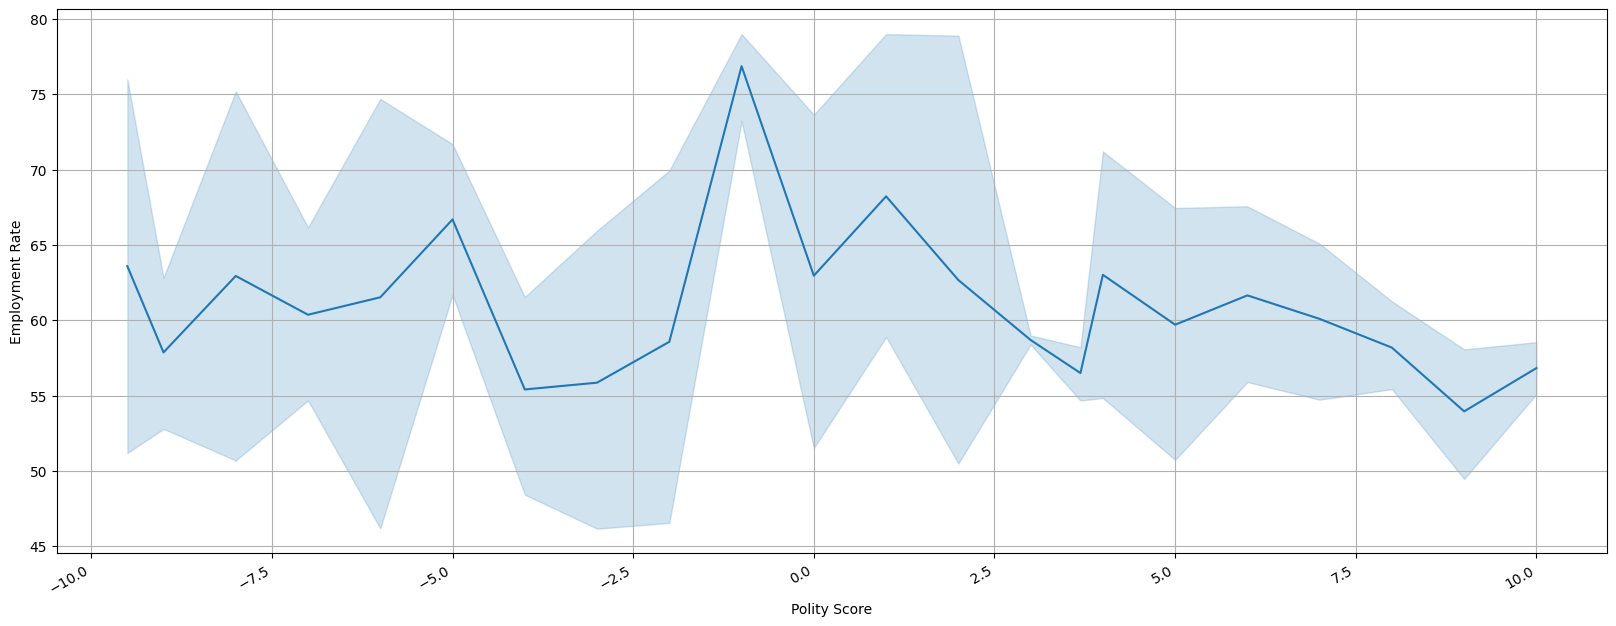

In [19]:
fig, ax = plt.subplots(1, figsize = (20, 8))
ax.grid()
fig.autofmt_xdate()
sns.lineplot(x="polityscore", y="employrate", data=df)
plt.xlabel('Polity Score')
plt.ylabel('Employment Rate')
plt.show()

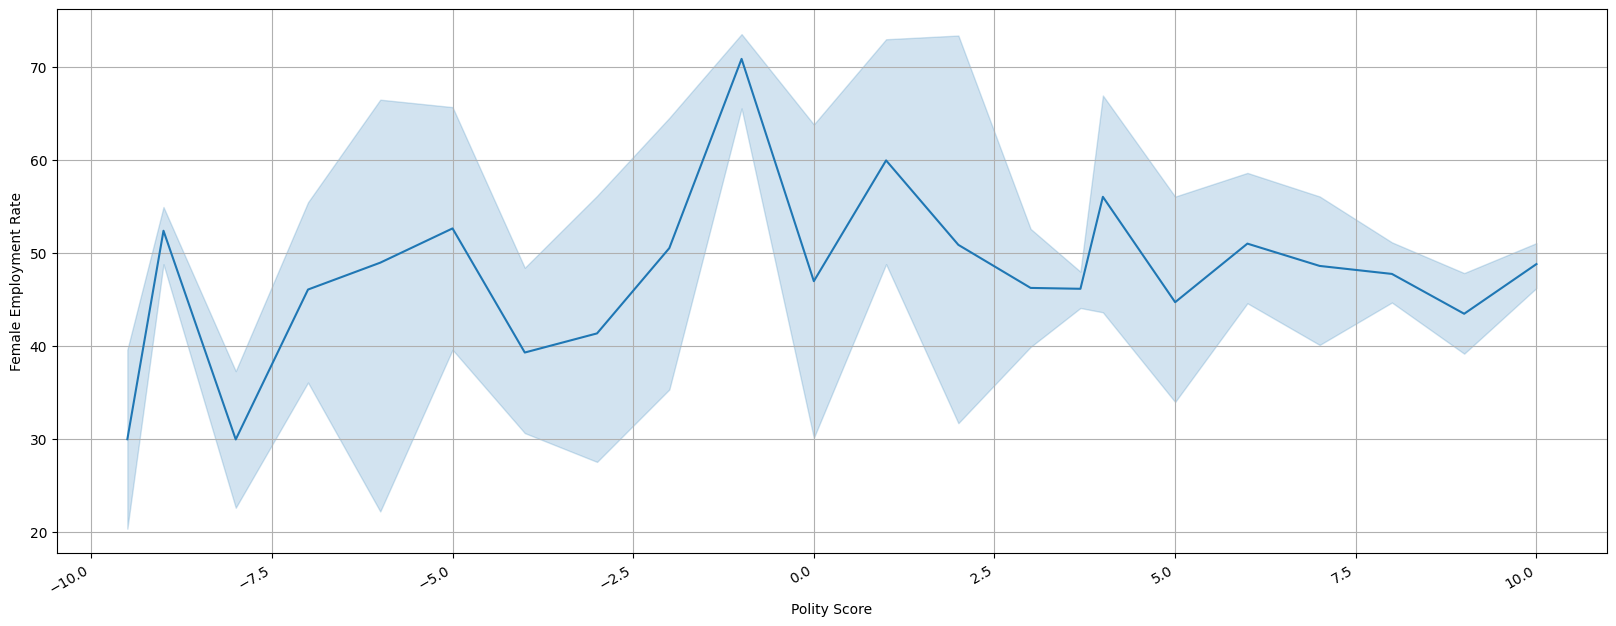

In [20]:
fig, ax = plt.subplots(1, figsize = (20, 8))
ax.grid()
fig.autofmt_xdate()
sns.lineplot(x="polityscore", y="femaleemployrate", data=df)
plt.xlabel('Polity Score')
plt.ylabel('Female Employment Rate')
plt.show()

## Choropleth Map (Country Code VS Features)

In [21]:
px.choropleth(df, locations='countrycode',color='internetuserate',scope='world',
                    range_color=((0, 100)),title='Internet users (per 100 people)',height=1000)

In [33]:
px.choropleth(df,locations='countrycode',color='incomeperperson',scope='world',
                    range_color=((100, 10000)),title='2010 Gross Domestic Product per capita in constant 2000 US$.',height=1000)

In [32]:
px.choropleth(df,locations='countrycode',color='co2emissions',scope='world',
                    range_color=((100, 10000)),title='2006 cumulative CO2 emission (metric tons)',height=1000)

In [31]:
px.choropleth(df,locations='countrycode',color='lifeexpectancy',scope='world',
                    range_color=((100, 10000)),title='2011 Life expectancy at birth (years)',height=1000)

In [29]:
px.choropleth(df,locations='countrycode',color='polityscore',scope='world',
                    range_color=((100, 10000)),title='2009 Democracy score (Polity)',height=1000)

In [30]:
px.choropleth(df,locations='countrycode',color='relectricperperson',scope='world',
                    range_color=((100, 10000)),title='2008 residential electricity consumption, per person (kWh)',height=1000)

In [34]:
px.choropleth(df,locations='countrycode',color='employrate',scope='world',
                    range_color=((100, 10000)),title='E2007 total employees age 15+ (% of population)',height=1000)

In [35]:
px.choropleth(df,locations='countrycode',color='urbanrate',scope='world',
                    range_color=((100, 10000)),title='2008 urban population (% of total)',height=1000)